In [3]:
from bioinfokit import analys
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from Bio.Blast import NCBIWWW

FILE_LOCATION = "resources/reads_for_analysis.fastq"

def encoding_check(file):
    analys.format.fq_qual_var(file)

def open_fastq(file):
    return analys.fastq.fastq_reader(file)

def unapply_fastq(fastq_read):
    seq_ids = []
    reads = []
    for item in fastq_read:
        seq_id, read, _, _ = item
        seq_ids.append(seq_id)
        reads.append(read)
    return (seq_ids, reads)

def count_gc_freq(reads):
    gc_freq = []
    for read in reads:
        gc_count = read.count('G') + read.count('C')
        length = len(read)
        gc_freq.append(round((gc_count/length), 2))
    return gc_freq

def find_peaks_pos(y_axis):
    peaks, _ = find_peaks(y_axis, prominence=300)
    return peaks.astype(int)


def printGraph(x_axis, y_axis, peaks):
    x_axis = x_axis * 100
    plt.plot(x_axis[peaks], y_axis[peaks], "xr"); plt.legend(['pikas'])
    for x, y in zip(x_axis[peaks], y_axis[peaks]):
        plt.text(x+2, y, '{}'.format(x))
    plt.plot(x_axis, y_axis)
    plt.xlabel('C/G nukleotidų dalis procentais')
    plt.ylabel('Read’ų skaičius')
    plt.grid(True)
    plt.savefig("gc_count_graph.jpg")

The fastq quality format is Sanger (Offset +33)


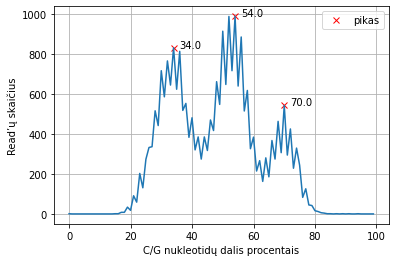

In [4]:
encoding_check(FILE_LOCATION)

fastq_read = open_fastq(FILE_LOCATION)
seq_ids, reads = unapply_fastq(fastq_read)
reads_with_ids =  np.array(list(zip(seq_ids, reads)))
gc_freq = count_gc_freq(reads)
x_axis = np.round(np.arange(0, 1, 0.01), 2)
gc_count = np.array([gc_freq.count(round(x, 2)) for x in x_axis])
peaks = find_peaks_pos(gc_count)
printGraph(x_axis, gc_count, peaks)

peak_sequences = []

for peak in peaks:
    seq_pos = [pos for pos, freq in enumerate(gc_freq) if freq == x_axis[peak]][:5]
    peak_sequences.append(reads_with_ids[seq_pos])


for i, sequences in enumerate(peak_sequences):
        file_name = "resources/peak_{}.fasta".format(i)
        with open(file_name, 'w') as file:
            for seq in sequences:
                seq_id, read = seq
                file.write(">{}\n{}\n".format(seq_id, read))